In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
df = pd.read_csv('/content/customer_features.csv')
df.head()


,CustomerID,Recency,Frequency,MonetaryValue,AvgTransactionValue,CLV,RollingAvgAmount
0,12346,325,1,77183.60,77183.600000,77183.60,77183.600000
1,12347,1,7,4310.00,615.714286,4310.00,23.766117
2,12348,74,4,1797.24,449.310000,1797.24,57.102366
3,12349,18,1,1757.55,1757.550000,1757.55,21.402283
4,12350,309,1,334.40,334.400000,334.40,19.870588


In [4]:
X = df.drop(columns=['CustomerID'])


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
inertia = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


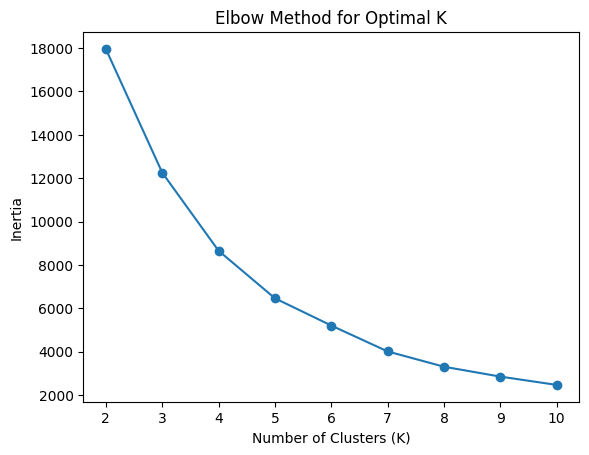

In [7]:
plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [8]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)



In [9]:
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.560


In [10]:
df['Cluster'].value_counts()


,count
Cluster,
0,3226
3,1091
2,19
1,2


In [11]:
cluster_summary = df.groupby('Cluster').mean()
cluster_summary


,CustomerID,Recency,Frequency,MonetaryValue,AvgTransactionValue,CLV,RollingAvgAmount
Cluster,,,,,,,
0,15281.544637,40.097644,4.797272,1918.814158,390.499430,1918.814158,34.732604
1,14396.000000,162.500000,1.500000,122828.050000,80709.925000,122828.050000,47951.900000
2,15355.789474,5.684211,69.947368,100242.536316,2129.932198,100242.536316,205.625928
3,15356.879010,245.001833,1.580202,523.418094,326.951092,523.418094,40.742184


In [12]:
df.to_csv('/content/customer_clusters.csv', index=False)
